In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from skelm import ELMRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("e-shop clothing 2008.csv", delimiter=';')
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [ ]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [ ]:
df.drop(['year', 'month', 'day', 'session ID', 'page 2 (clothing model)', 'model photography', 'price 2', 'page'], axis = 1, inplace = True)

df.head()

,order,country,page 1 (main category),colour,location,price
0,1,29,1,1,5,28
1,2,29,1,1,6,33
2,3,29,2,10,2,52
3,4,29,2,6,6,38
4,5,29,2,4,3,52


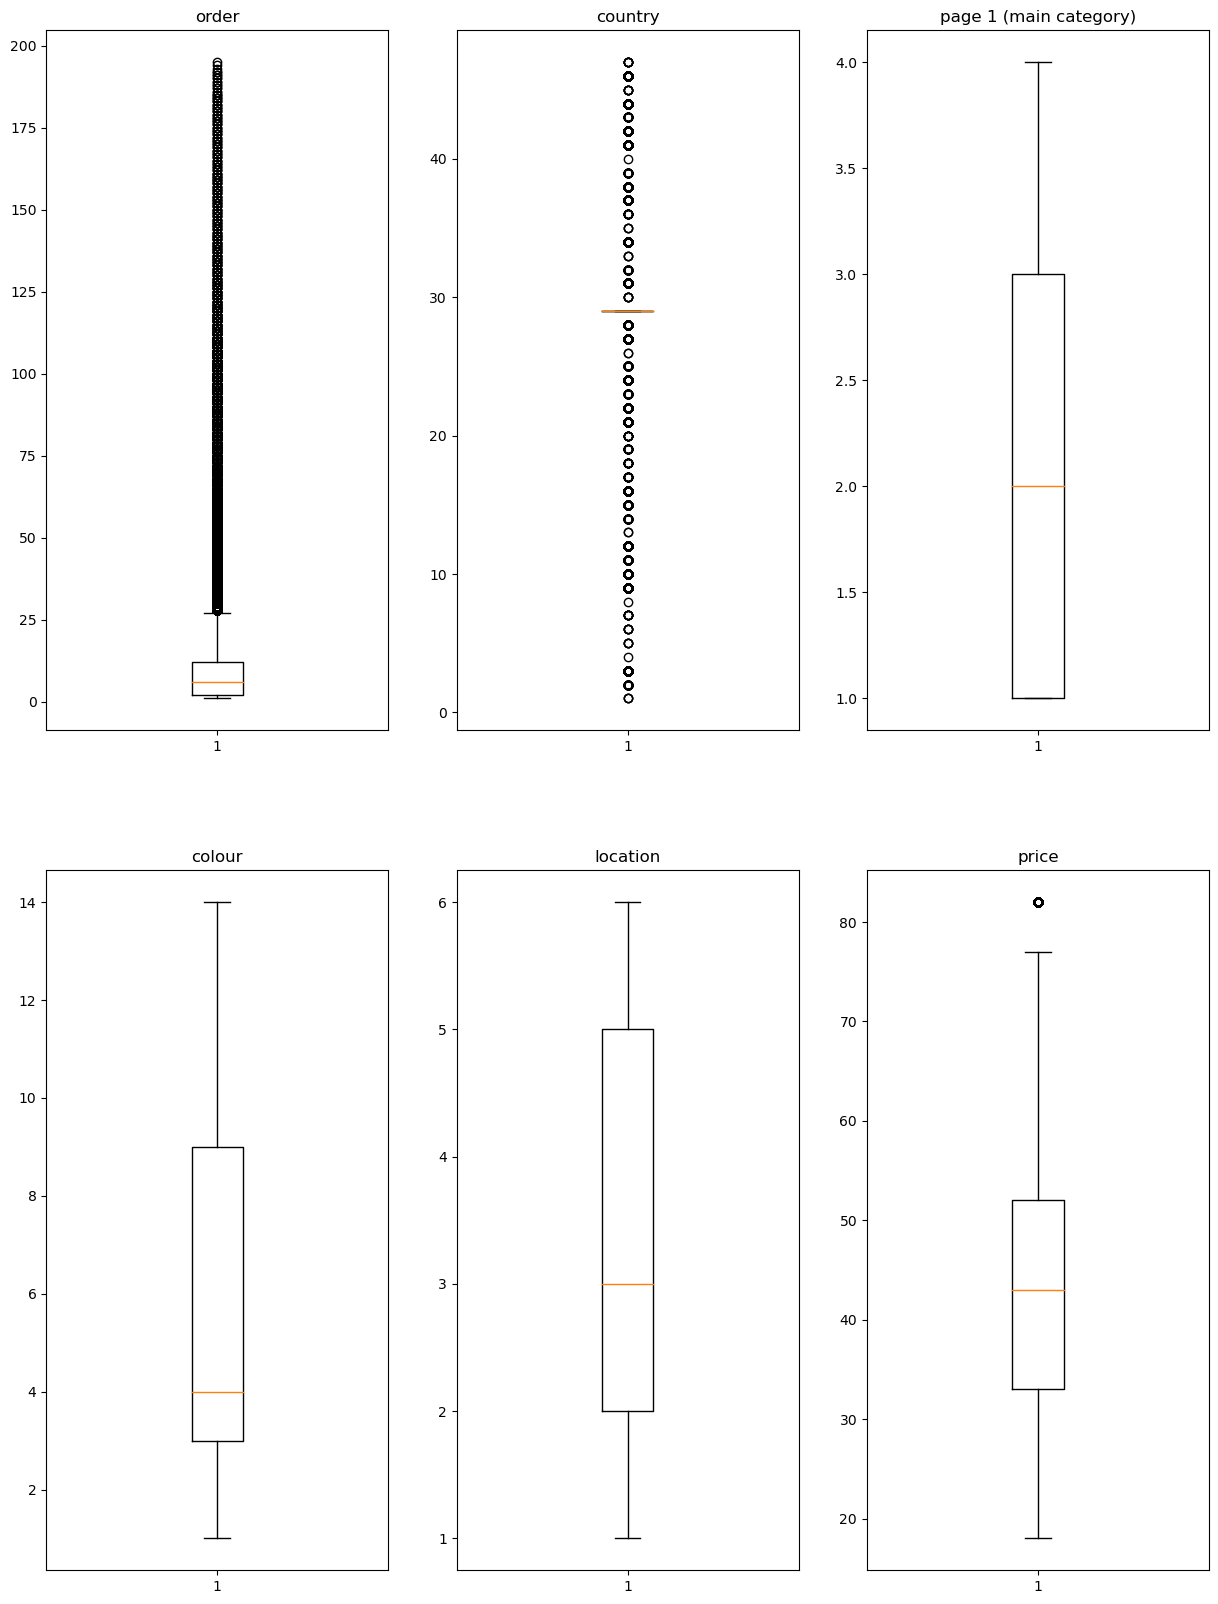

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(20)
titles = list(df.columns)

# To find outliers using box plots

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.boxplot(df[df.columns[[i-1]]])
    plt.title(titles[i-1])

In [ ]:
df.corr()

,order,country,page 1 (main category),colour,location,price
order,1.000000,-0.064709,0.151693,0.046427,0.014854,-0.064779
country,-0.064709,1.000000,0.132817,0.009789,-0.009072,-0.045345
page 1 (main category),0.151693,0.132817,1.000000,0.230577,0.015939,-0.364791
colour,0.046427,0.009789,0.230577,1.000000,0.042062,-0.091159
location,0.014854,-0.009072,0.015939,0.042062,1.000000,-0.084653
price,-0.064779,-0.045345,-0.364791,-0.091159,-0.084653,1.000000


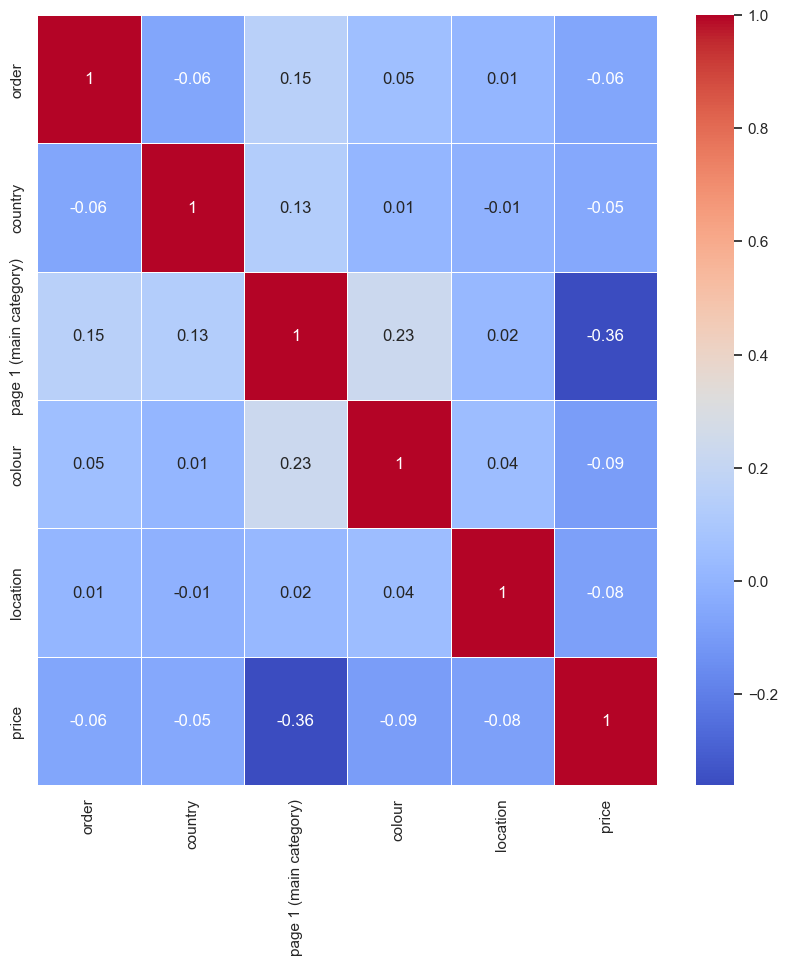

In [ ]:
# Correlation Heatmap of numeric columns to chech of duplicate coulmns.

sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(data=df.corr().round(2), annot=True, cmap="coolwarm", linewidth=.5);

In [ ]:
X = df.drop('price', axis = 1)
y = df['price']

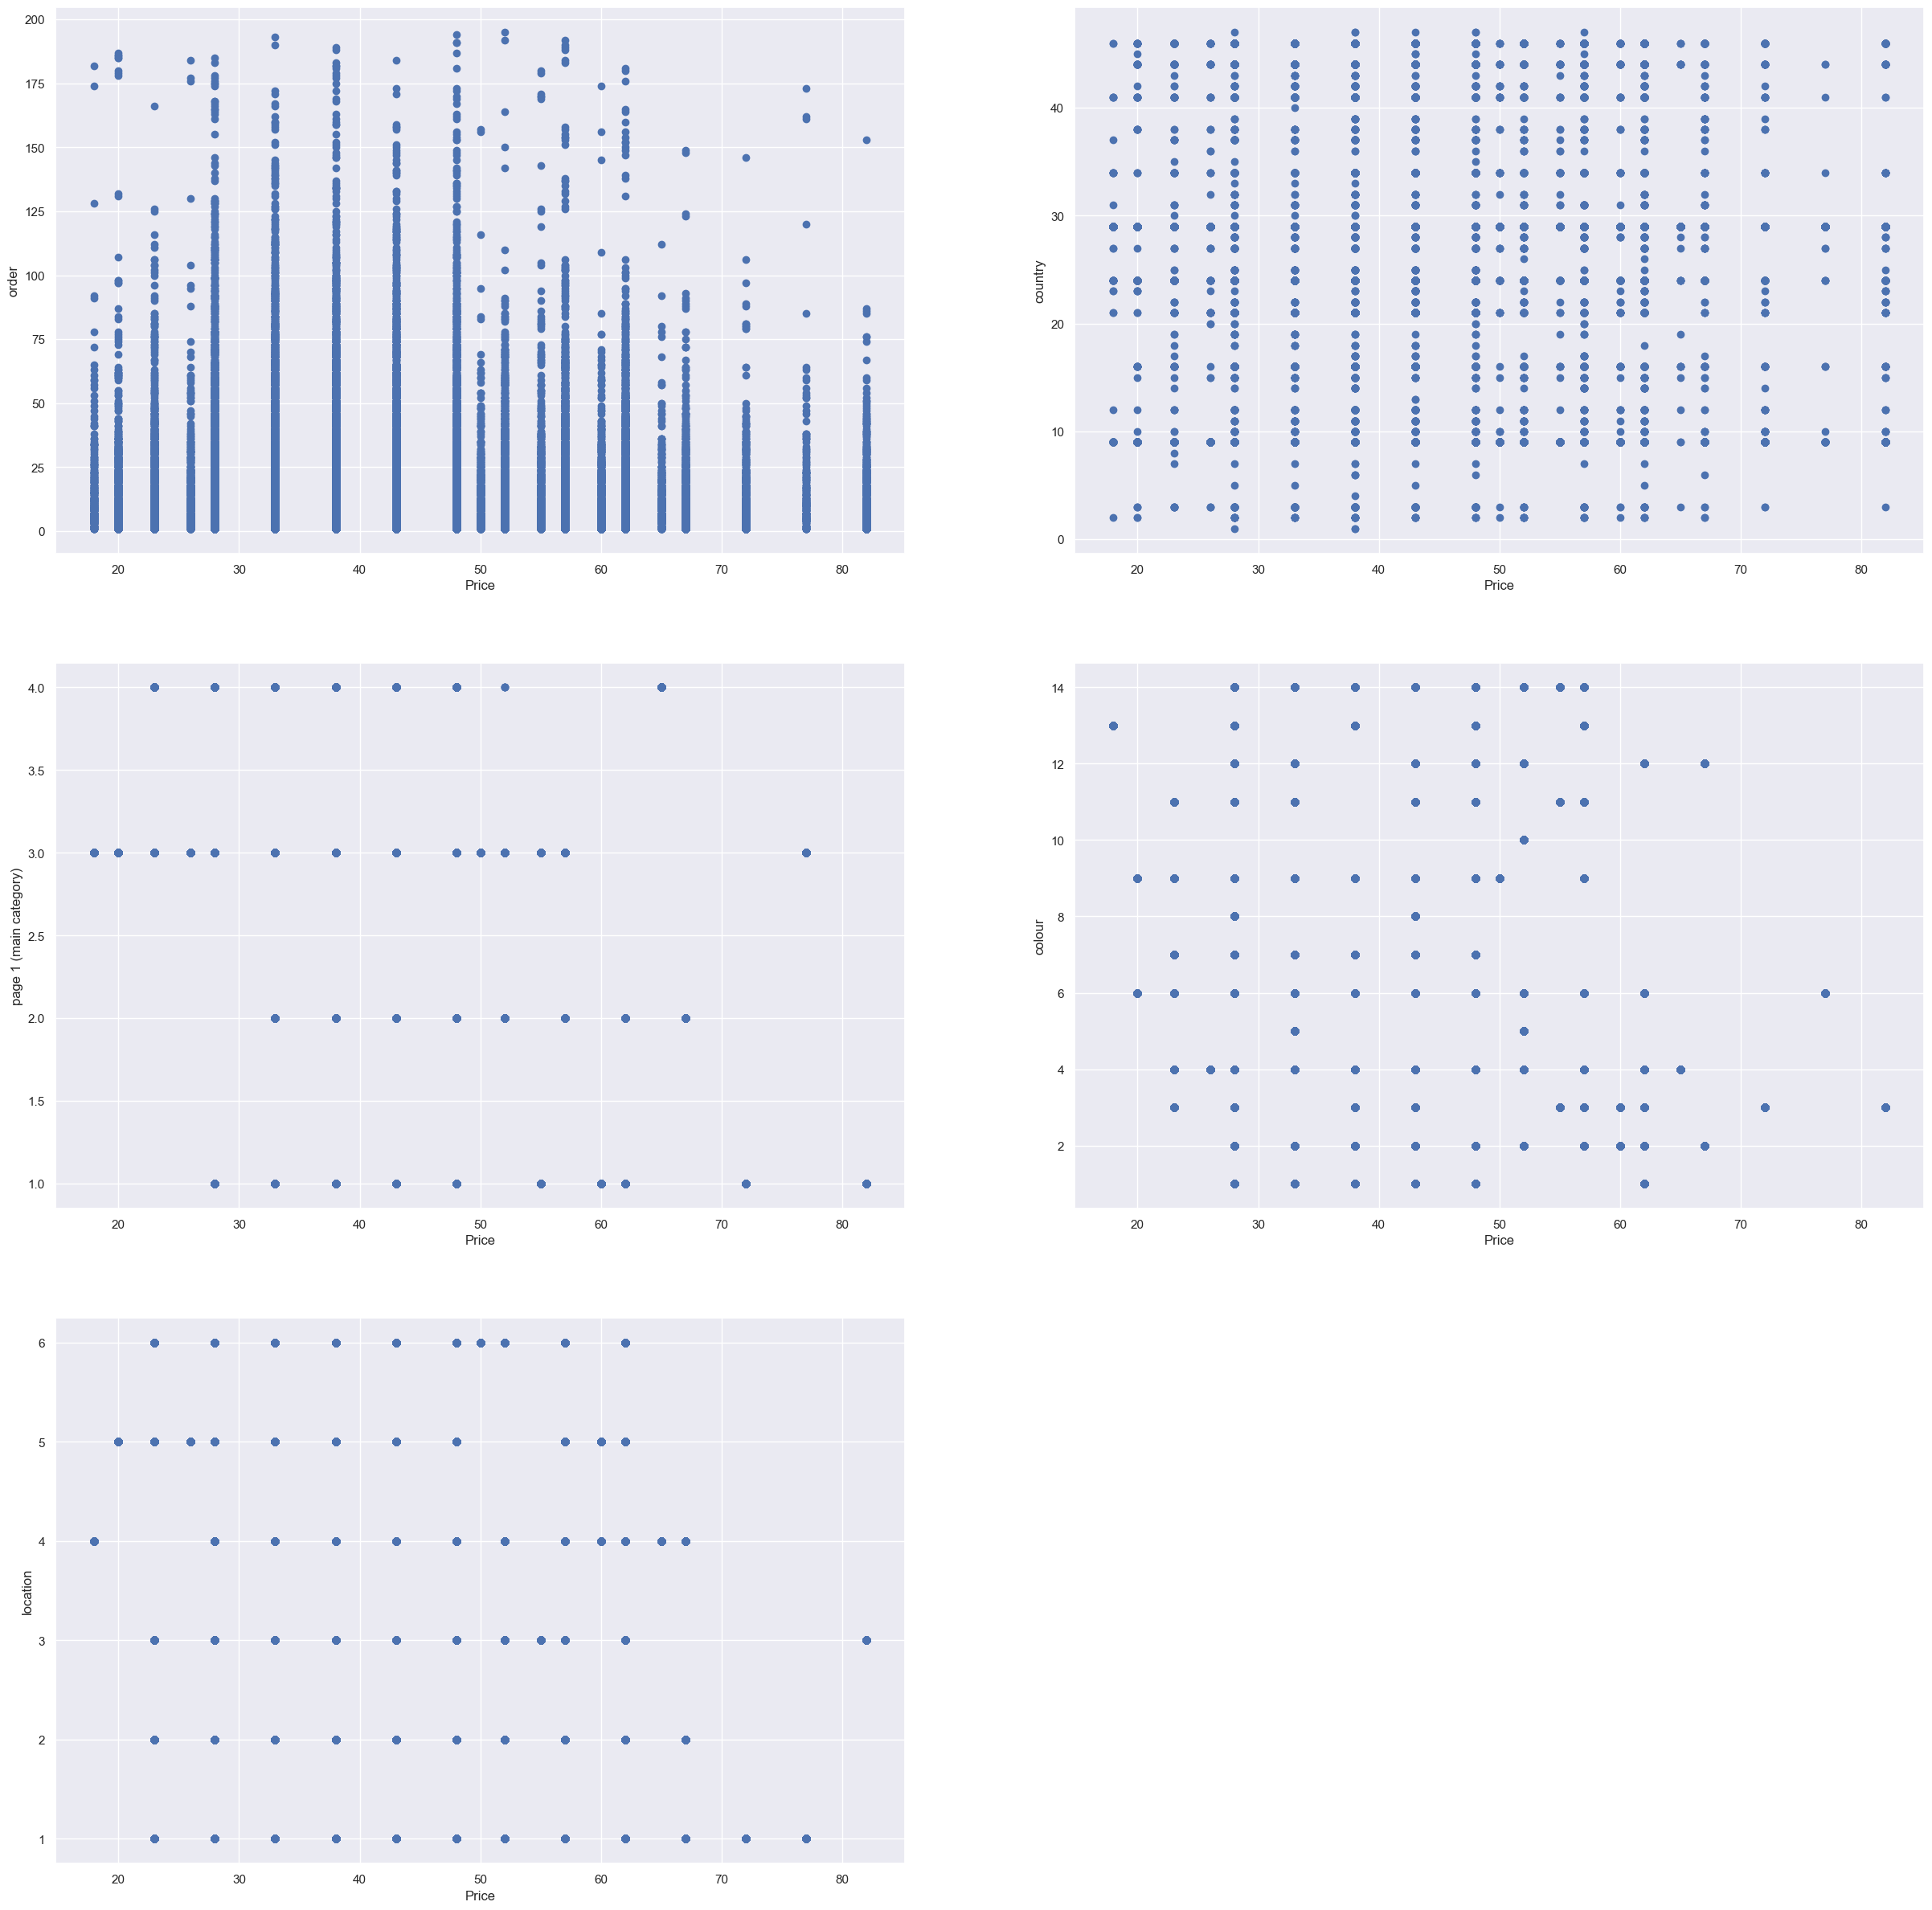

In [ ]:
# Using Scatterplots to understand the Data trends.
# Scatterplots show how much one variable is affected by another.

fscatter = plt.figure()
fscatter.set_figwidth(30)
fscatter.set_figheight(30)
titles = list(X.columns)

for i in range(1, 6):
    plt.subplot(3, 2, i)
    plt.scatter(y, X[X.columns[[i-1]]])
    plt.ylabel(titles[i-1])
    plt.xlabel("Price")

## Principal Component Analysis

In [ ]:
pca=PCA()
X_pca = pca.fit_transform(X)
per_var = np.round(pca.explained_variance_ratio_.cumsum()*100, 2)
per_var

array([ 71.39,  91.34,  98.39,  99.54, 100.  ])

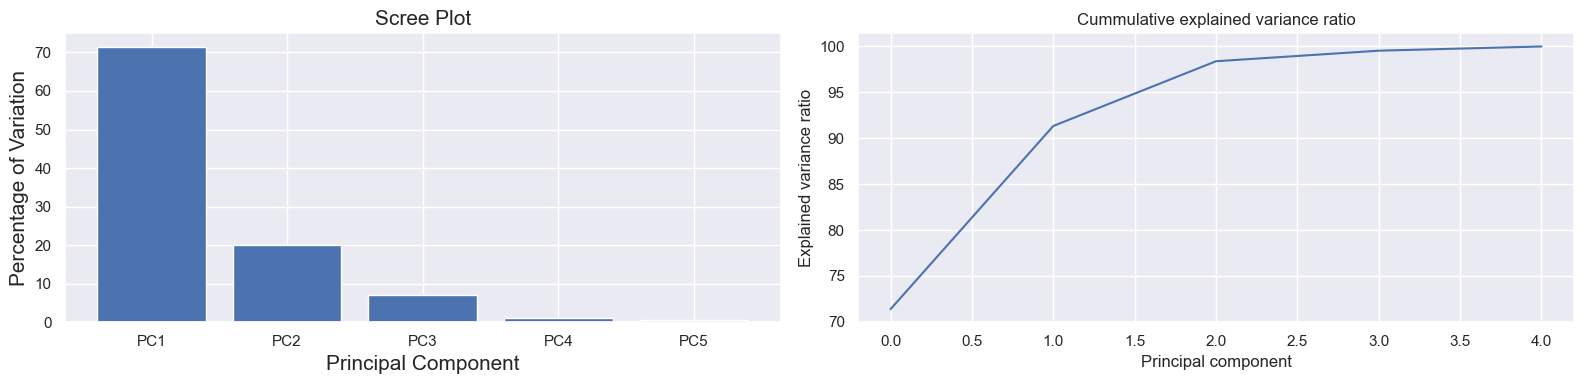

In [ ]:
princ_comp = ['PC' + str(x) for x in range(1, 6)]

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.bar(x = range(1, 6),
        height = list(np.round(pca.explained_variance_ratio_*100, 2)),
        tick_label = princ_comp)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)

plt.subplot(1, 2, 2)
plt.plot(per_var)
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.title('Cummulative explained variance ratio')
plt.tight_layout()
plt.show();

In [ ]:
pca_data = pca.transform(X)
pca_df = pd.DataFrame(pca_data[:, :5], columns = princ_comp[:5])
pca_df["Price"] = y
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,Price
0,-9.001557,-1.522303,5.142325,1.860495,1.006912,28
1,-8.000925,-1.567330,5.139880,2.858675,1.025282,33
2,-6.852191,-1.768346,-3.803339,-1.321395,0.594160,52
3,-5.910184,-1.753436,0.124017,2.757759,0.373285,38
4,-4.949708,-1.778818,2.196967,-0.202357,0.241256,52


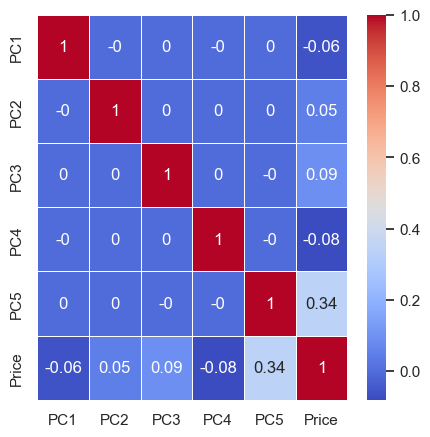

In [ ]:
# Correlation Heatmap of numeric columns to chech of duplicate coulmns.

sns.set(rc={'figure.figsize':(5, 5)})
sns.heatmap(data=pca_df.corr().round(2), annot=True, cmap="coolwarm", linewidth=.5);

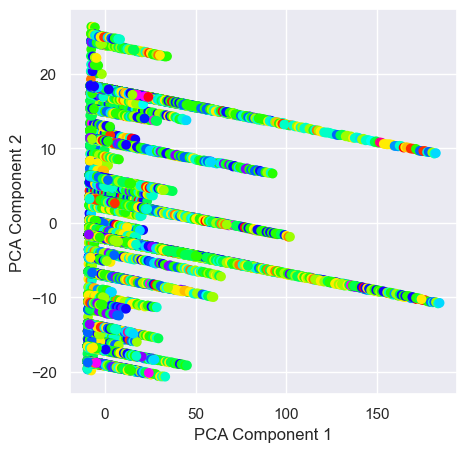

In [ ]:
plt.scatter(pca_data[:,0], pca_data[:,1], c = y, cmap = "hsv")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
def best_tune(X, y, mlmodel, param_grid, score_func, positive_scoreing = True, cv = 5):

    """
    Ckecks for the best possible combination of Hyperparameters to increase the validation score.

    :param X: The Features or input parameters.
    :type X: Pandas DataFrame
    :param y: The Target or output parameters.
    :type y: Pandas DataFrame
    :param param_grid: The possible values for the Hyperparameters.
    :type param_grid: Dict
    :param score_func: The function over which the performance of the model is judged.
    :type score_func: Function
    :param positive_scoreing: Is the score_func judged +vely or -vely.
    :type positive_scoreing: Bool
    :param cv: No of different splits to validate the model on.
    :type cv: Int

    :return: Best possible combination of Hyperparameters and best Validation score .
    :rtype: Dict
    """

    best_set = {}
    memory = {"tune": {},
              "score": 0}

    class __model(mlmodel):
        def __init__(self, **kwargs):
            super().__init__(**kwargs)

    for param in param_grid.keys():
        memory["tune"][param] = param_grid[param][0]

    first = True

    for param in param_grid.keys():

        memory["tune"] = best_set
        print(memory)
        for val in param_grid[param]:
            memory["tune"][param] = val

            P = []
            for i in range(cv):
                try:
                    model = __model(**memory["tune"])
                    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=i)

                    model.fit(X_train, y_train)
                except:
                    continue
                else:
                    y_pred = model.predict(X_valid)
                    P.append(abs(score_func(y_valid, y_pred)))

            if len(P) != 0:
                mean_p = sum(P)/len(P)
            else:
                continue

            if positive_scoreing == True:
                if mean_p > memory["score"]:
                    best_set = dict(memory["tune"])
                    memory["score"] = float(mean_p)
                else:
                    memory["tune"][param] = None
            else:
                if first:
                    best_set = dict(memory["tune"])
                    memory["score"] = float(mean_p)
                    first = False
                if mean_p < memory["score"]:
                    best_set = dict(memory["tune"])
                    memory["score"] = float(mean_p)


    memory["tune"] = best_set
    return memory

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,order,country,page 1 (main category),colour,location
106979,21,29,3,13,1
69437,6,29,2,13,3
132136,2,29,3,9,5
50042,2,29,2,2,4
92387,16,29,2,9,5


In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X.columns)
X_train.head()

,order,country,page 1 (main category),colour,location
0,0.103093,0.608696,0.666667,0.923077,0.0
1,0.025773,0.608696,0.333333,0.923077,0.4
2,0.005155,0.608696,0.666667,0.615385,0.8
3,0.005155,0.608696,0.333333,0.076923,0.6
4,0.077320,0.608696,0.333333,0.615385,0.8


## KNN Regression

In [ ]:
param_grid = {"n_neighbors": list(range(2, 10)),
              "weights": ["uniform", "distance"],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
             }
best_tune(X_train,
          y_train,
          mlmodel = KNeighborsRegressor,
          param_grid = param_grid,
          score_func = r2_score,
          positive_scoreing = True)

{'tune': {}, 'score': 0}
{'tune': {'n_neighbors': 9}, 'score': 0.6309949686278078}
{'tune': {'n_neighbors': 9, 'weights': None}, 'score': 0.6309949686278078}


{'tune': {'n_neighbors': 9, 'weights': None, 'algorithm': 'brute'},
 'score': 0.6324613145614997}

## Random Forest Regression


In [ ]:
 param_grid = {"n_estimators":[10, 20, 50, 70, 100],
              "max_depth":[4, 5, 6, 7, 8],
              "min_samples_split":[2, 4, 8, 16],
              "min_samples_leaf":[2, 4, 8, 16],
              "bootstrap":[True, False]
             }

best_tune(X_train,
          y_train,
          mlmodel = RandomForestRegressor,
          param_grid = param_grid,
          score_func = r2_score,
          positive_scoreing = True)

{'tune': {}, 'score': 0}
{'tune': {'n_estimators': 70}, 'score': 0.6483999551806908}
{'tune': {'n_estimators': 70, 'max_depth': None}, 'score': 0.6483999551806908}
{'tune': {'n_estimators': 70, 'max_depth': None, 'min_samples_split': 16}, 'score': 0.6594183371388554}
{'tune': {'n_estimators': 70, 'max_depth': None, 'min_samples_split': 16, 'min_samples_leaf': 16}, 'score': 0.6660017586290593}


{'tune': {'n_estimators': 70,
  'max_depth': None,
  'min_samples_split': 16,
  'min_samples_leaf': 16,
  'bootstrap': None},
 'score': 0.6660017586290593}

## ELM Regression

In [ ]:
param_grid = {"alpha":[1e-07, 1e-06, 1e-05, 1e-04,1e-03],
              "batch_size":[100, 200, 500, 1000],
              "include_original_features":[True, False],
              "n_neurons":[10, 50, 100, 500, 1000],
              "ufunc":['tanh', 'sigm', 'relu', 'lin'],
              "density":[0.1, 0.25, 0.5, 0.75, 1],
              "pairwise_metric":['euclidean', 'cityblock', 'cosine' ]
             }
best_tune(X_train,
          y_train,
          mlmodel = ELMRegressor,
          param_grid = param_grid,
          score_func = r2_score,
          positive_scoreing = True)

{'tune': {}, 'score': 0}
{'tune': {'alpha': 1e-07}, 'score': 0.3000254915981451}
{'tune': {'alpha': 1e-07, 'batch_size': None}, 'score': 0.3000254915981451}
{'tune': {'alpha': 1e-07, 'batch_size': None, 'include_original_features': None}, 'score': 0.3000254915981451}
{'tune': {'alpha': 1e-07, 'batch_size': None, 'include_original_features': None, 'n_neurons': None}, 'score': 0.3000254915981451}
{'tune': {'alpha': 1e-07, 'batch_size': None, 'include_original_features': None, 'n_neurons': None, 'ufunc': 'relu'}, 'score': 0.3815196824986888}
{'tune': {'alpha': 1e-07, 'batch_size': None, 'include_original_features': None, 'n_neurons': None, 'ufunc': 'relu', 'density': None}, 'score': 0.3815196824986888}


{'tune': {'alpha': 1e-07,
  'batch_size': None,
  'include_original_features': None,
  'n_neurons': None,
  'ufunc': 'relu',
  'density': None,
  'pairwise_metric': None},
 'score': 0.3815196824986888}

## SVM Regression

In [ ]:
param_grid = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}
best_tune(X_train,
          y_train,
          mlmodel = SVR,
          param_grid = param_grid,
          score_func = r2_score)

{'tune': {}, 'score': 0}
